<a href="https://colab.research.google.com/github/aliss153/Aprendizaje-Automatico/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alisson Manosalvas &bull; 21 Dic 2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [32]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs # Dataset
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

# Algoritmo k-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

**- Mostrar algunos datos.**

In [2]:
url_data = "https://raw.githubusercontent.com/aliss153/Aprendizaje-Automatico/main/Country-data.csv"
df = pd.read_csv(url_data)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**- Mostrar una descripción de los datos.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**- Escalar los datos si es necesario.**

In [5]:
numeric_cols = df.drop(columns=['country']).columns
numeric_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_values, columns=numeric_cols)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


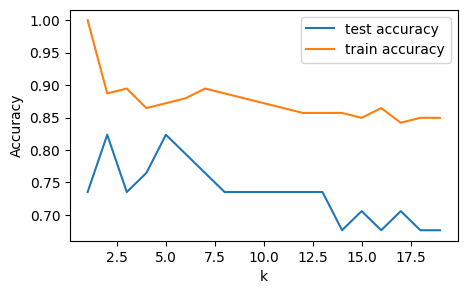

Mejor k: 2


In [9]:
X = df.drop(columns=["country"])
y = pd.qcut(df["income"], q=3, labels=[0, 1, 2])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=49, stratify=y)

# Precisión de los modelos
k_values = range(1, 20)
precisions_test = []
precisions_train = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    precisions_test.append(accuracy_score(y_test, modelo.predict(X_test)))
    precisions_train.append(accuracy_score(y_train, modelo.predict(X_train)))

plt.figure(figsize=(5, 3))
plt.plot(k_values, precisions_test, label="test accuracy")
plt.plot(k_values, precisions_train, label="train accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

best_k = list(k_values)[int(np.argmax(precisions_test))]
print("Mejor k:", best_k)


In [10]:
max_acc = max(precisions_test)
candidatos = [k for k, acc in zip(k_values, precisions_test) if acc == max_acc]

print("Max accuracy:", max_acc)
print("k candidatos (empate):", candidatos)

Max accuracy: 0.8235294117647058
k candidatos (empate): [2, 5]



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

**Nota:**
Como tengo un 'empate' veré con cual k será mejor

**- Entreno el modelo con el valor de k seleccionado.**

In [11]:
best_k = 2
modelo_final = KNeighborsClassifier(n_neighbors=best_k)
modelo_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

**- Evalúo el modelo con el conjunto de datos de prueba.**

In [12]:
y_pred = modelo_final.predict(X_test)
y_pred[:10]

array([2, 1, 2, 1, 0, 0, 2, 2, 2, 0])

**- Generp una matriz de confusión y muestra las métricas de evaluación.**

In [15]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy (test):", round(acc, 4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n", cm)

# Reporte de clasificación
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))


Accuracy (test): 0.8235

Matriz de confusión:
 [[ 9  3  0]
 [ 3  8  0]
 [ 0  0 11]]

Classification report:

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.73      0.73      0.73        11
           2       1.00      1.00      1.00        11

    accuracy                           0.82        34
   macro avg       0.83      0.83      0.83        34
weighted avg       0.82      0.82      0.82        34



- Con k=5

In [19]:
best_k2 = 5
modelo_final = KNeighborsClassifier(n_neighbors=best_k2)
modelo_final.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred2= modelo_final.predict(X_test)
y_pred2[:10]

array([2, 1, 2, 1, 1, 0, 2, 2, 2, 0])

In [22]:
acc = accuracy_score(y_test, y_pred2)
print("Accuracy (test):", round(acc, 4))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred2)
print("\nMatriz de confusión:\n", cm)

# Reporte de clasificación
print("\nClassification report:\n")
print(classification_report(y_test, y_pred2))

Accuracy (test): 0.8235

Matriz de confusión:
 [[ 7  5  0]
 [ 1 10  0]
 [ 0  0 11]]

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.67      0.91      0.77        11
           2       1.00      1.00      1.00        11

    accuracy                           0.82        34
   macro avg       0.85      0.83      0.82        34
weighted avg       0.85      0.82      0.82        34



yo elegiría k = 5 porque, suele ser más estable que k=2, ofrece un comportamiento más estable ante ruido y tiene un buen desempeño, se ve en el reporte de clasificación y matriz de confusión

---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

**- Muestra algunos datos.**

In [ ]:
url_data = "https://raw.githubusercontent.com/aliss153/Aprendizaje-Automatico/main/Country-data.csv"
df = pd.read_csv(url_data)
df.head()

**- Muestra una descripción de los datos.**

In [23]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**- Escala los datos si es necesario.**

In [25]:
y = df["gdpp"]
X = df.drop(columns=["country", "gdpp"])

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(167, 8)


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


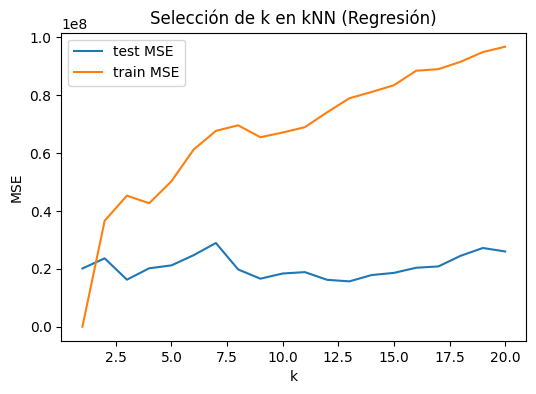

Mejor k (regresión): 13
MSE mínimo (test): 15667268.88


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=49)
k_values = range(1, 21)
mse_test = []
mse_train = []

for k in k_values:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)

    pred_test = modelo.predict(X_test)
    pred_train = modelo.predict(X_train)

    mse_test.append(mean_squared_error(y_test, pred_test))
    mse_train.append(mean_squared_error(y_train, pred_train))

# 3) Gráfica k vs MSE
plt.figure(figsize=(6, 4))
plt.plot(list(k_values), mse_test, label="test MSE")
plt.plot(list(k_values), mse_train, label="train MSE")
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("Selección de k en kNN (Regresión)")
plt.legend()
plt.show()


best_k_reg = list(k_values)[int(np.argmin(mse_test))]
print("Mejor k (regresión):", best_k_reg)
print("MSE mínimo (test):", round(min(mse_test), 2))

Se puede ver que el MSE (la línea azul) varía con k y alcanza su valor mínimo en k=13 aprox, se elige esa K porque ahi se minimiza el error de predicción


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

**- Entrena el modelo con el valor de k seleccionado.**

In [34]:
best_k_reg = 13
modelo_reg = KNeighborsRegressor(n_neighbors=best_k_reg)
modelo_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

**- Evalúa el modelo con el conjunto de datos de prueba.**

In [35]:
y_pred = modelo_reg.predict(X_test)
y_pred[:10]

array([44723.07692308,  2824.46153846,  2958.76923077,   725.        ,
       36515.38461538,  3416.        , 37946.15384615,  4463.69230769,
        1225.        ,  7826.92307692])

**- Calcula el error cuadrático medio.**

In [36]:
mse = mean_squared_error(y_test, y_pred)
print("MSE (test):", round(mse, 2))

MSE (test): 15667268.88


Este valor representa el error promedio al cuadrado entre los valores reales de gdpp y los valores predichos